In [396]:
import numpy as np 
from numpy.linalg import lstsq
import sklearn
import matplotlib.pyplot as plt

### 3.1 Implement Orthogonal Matching Pursuit

In [443]:

def omp_regression(X,y,T): 
    #initzialize Dimensions of Matrix X and initizalize A,B and r 
    N,D = X.shape
    A = []
    B = np.arange(D).tolist()
    r = y
    #Get the matrix with the solutions
    #beta_t = np.zeros((D,T))
    beta_solution = np.zeros((D,T))
    
    #iterate through every T     
    
    for t in range(T): 
        #print("------------Iteration",t)
        #calculate the correlations and the argmax of the indices 
        j = B[np.argmax(np.abs(np.dot(np.transpose(X[:, B]),r)))]
        #add index j and remove
        #print("argmaxindex =",j)
        #print("B_previous =",B)
        A.append(j)
        B.remove(j)
    
        #print("B=",B)
        #print("A=",A)
        #calculate the active matrix from indices
        X_act = X[:, A]
        #solve least squares
        beta = np.linalg.lstsq(X_act, y,rcond=None)[0]
        #print("beta=", beta)
        beta_solution[A,t] = beta
        #beta_t[A,t] = beta
        #beta_t.append(beta)
        
        #update solution y
        r = y - X_act @ beta 
         
    return beta_solution




<div style="color: green; font-weight:
bold">
The function is virtually identical to the sample solution.
</div>

In [475]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])
T = 2

beta_sol = omp_regression(X,y,T)
print(beta_sol)
b_pred = beta_sol[:,T-1]
print(y_pred)

print(X@b_pred)

[[0.00000000e+00 9.72950711e-15]
 [5.00000000e+00 5.00000000e+00]]
[9.72950711e-15 5.00000000e+00]
[10. 20. 30. 40.]


<div style="color: green; font-weight:
bold">
The variable 'y_pred' is undefined, insinuating a bad usage of the notebook.
</div>

### 3.2 Classification with sparse LDA 

In [135]:
from sklearn.datasets import load_digits #import digits data set

digits = load_digits() #rename data set
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [136]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [137]:
#size of the images 
np.shape(digits.data) 

(1797, 64)

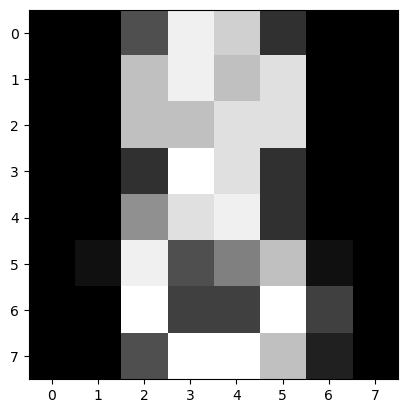

In [138]:
img = images[183]
plt.figure() 
plt.gray() 
plt.imshow(img, interpolation = "nearest")
plt.show()

<div style="color: green; font-weight:
bold">
Not sure why you would display an 8 when we're only working with 3s and 9s.
</div>

In [139]:
#Use a logical mask to filter data
mask = np.logical_or(target == 3, target == 9)
images_filtered = images[mask]
data_filtered = data[mask]
target_filtered = target[mask]

In [140]:
#dividing sets into test and training sets
from sklearn import model_selection

X_all = data_filtered
Y_all = target_filtered
#Split the filtered data sets into training and test sets
X_train,X_test,Y_train, Y_test = model_selection.train_test_split(X_all,Y_all,test_size=0.4,random_state=0)

In [141]:
#Look at the ratio of the sets
x_ratio = np.shape(X_train)[0]/np.shape(X_test)[0]
y_ratio = np.shape(Y_train)[0]/np.shape(Y_test)[0]

print(x_ratio,y_ratio)
print(np.shape(X_train))

1.4863013698630136 1.4863013698630136
(217, 64)


<div style="color: green; font-weight:
bold">
This is something you print out for testing and delete before submission.
</div>

In [155]:
#Transform the Y_train and Y_test into binary (-1,1) arrays
for i in range(Y_train.shape[0]): 
    if Y_train[i] == 3: 
        Y_train[i] = 1
    elif Y_train[i] == 9: 
        Y_train[i] = -1

for i in range(Y_test.shape[0]): 
    if Y_test[i] == 3: 
        Y_test[i] = 1
    elif Y_test[i] == 9: 
        Y_test[i] = -1
    

<div style="color: green; font-weight:
bold">
This can be vectorized, see sample solution (although speed is not really a concern here)
</div>

In [237]:
print(X_test.shape)
print(Y_test.shape)

(146, 64)
(146,)


<div style="color: green; font-weight:
bold">
See above
</div>

In [479]:
#predict with T on train set and then test on test set


###########choose T (for example choose 3 as in ex1###########
T = 3
##############################

sol = omp_regression(X_train,Y_train,T)
y_pred = np.sign((X_test @ sol[:,T-1]).round(1))
comp = np.equal(y_pred,Y_test)


print(comp,np.mean(comp))

[ True  True  True  True  True  True False  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True] 0.9315068493150684


<div style="color: green; font-weight:
bold">
See above
</div>

<div style="color: green; font-weight:
bold">
The only result you give is the value 0.931..., which is 1 - the error rate at iteration T=3, and even that is presented in a bad way. None of the questions were answered and no visualizations were provided.
</div>